<a href="https://colab.research.google.com/github/akhilesh-kanmanthreddy/2024-Science-Fair-Tumor-Evolution-Forecasting/blob/main/2024_science_fair_model_comparison_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pywavefront

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.spatial import ConvexHull, distance

def calculate_volume(coordinates):
    # Calculate the volume of a convex hull formed by the coordinates
    # using the ConvexHull method from the scipy library
    hull = ConvexHull(coordinates)
    hull_volume = hull.volume

    return hull_volume

def compare_coordinates_metrics(coord_set1, coord_set2):
    volume1 = calculate_volume(coord_set1)
    volume2 = calculate_volume(coord_set2)
    # RMSE
    rmse = np.sqrt(mean_squared_error([volume1], [volume2]))
    # MAE
    mae = mean_absolute_error([volume1], [volume2])
    # VOI
    voi = 1 - (min(volume1, volume2) / max(volume1, volume2))
    # Jaccard Index
    intersection = np.intersect1d(volume1, volume2)
    union = np.union1d(volume1, volume2)
    jaccard_index = len(intersection) / len(union)
    # Hausdorff Distance
    hausdorff_distance = max(distance.directed_hausdorff(coord_set1, coord_set2)[0],
                             distance.directed_hausdorff(coord_set2, coord_set1)[0])
    print(f"Theoretical Volume 1: {volume1}")
    print(f"Theoretical Volume 2: {volume2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Volume Overlap Index (VOI): {voi}")
    print(f"Jaccard Index: {jaccard_index}")
    print(f"Hausdorff Distance: {hausdorff_distance}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.spatial import ConvexHull, distance
from scipy.interpolate import griddata

def compare_coordinates_heat_volume(coord_set1, coord_set2, grid_resolution=100):
    volume1 = calculate_volume(coord_set1)
    volume2 = calculate_volume(coord_set2)
    x1, y1, z1 = np.array(coord_set1).T
    x2, y2, z2 = np.array(coord_set2).T
    x_min, x_max = min(np.min(x1), np.min(x2)), max(np.max(x1), np.max(x2))
    y_min, y_max = min(np.min(y1), np.min(y2)), max(np.max(y1), np.max(y2))
    z_min, z_max = min(np.min(z1), np.min(z2)), max(np.max(z1), np.max(z2))
    grid_x, grid_y, grid_z1 = np.meshgrid(
        np.linspace(x_min, x_max, grid_resolution),
        np.linspace(y_min, y_max, grid_resolution),
        np.linspace(z_min, z_max, grid_resolution),
        indexing='ij'
    )
    points1 = np.column_stack((x1, y1, z1))
    values1 = np.ones(len(coord_set1)) * volume1
    points2 = np.column_stack((x2, y2, z2))
    values2 = np.ones(len(coord_set2)) * volume2
    grid_volume1 = griddata(points1, values1, (grid_x, grid_y, grid_z1), method='linear')
    grid_volume2 = griddata(points2, values2, (grid_x, grid_y, grid_z1), method='linear')
    volume_difference = np.abs(grid_volume1 - grid_volume2)
    # Create a 3D heatmap
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(grid_x.flatten(), grid_y.flatten(), grid_z1.flatten(), c=volume_difference.flatten(), cmap='viridis', marker='o')
    # Customize the colorbar
    cbar = plt.colorbar(sc)
    cbar.set_label('Volume Difference', rotation=270, labelpad=15)
    ax.set_title('3D Heatmap - Volume Difference')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [ ]:
#load obj points
def load_obj(file_path):
    vertices = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts:
                if parts[0] == 'v' and len(parts) == 4:
                    # Read vertices (v x y z)
                    x, y, z = map(float, parts[1:])
                    vertices.append((x, y, z))

    return vertices

In [ ]:
compare_coordinates_metrics(load_obj("/content/drive/MyDrive/Science Fair 2024 Data/patient 040028-14/040028N-obj/040028_19020415_AX_T1_FL3D_msk/tinker_centered.obj"), list_of_coordinates2)

Theoretical Volume 1: 13048.50000000001
Theoretical Volume 2: 6918370.450252474
Root Mean Squared Error (RMSE): 6905321.950252474
Mean Absolute Error (MAE): 6905321.950252474
Volume Overlap Index (VOI): 0.998113934474335
Jaccard Index: 0.0
Hausdorff Distance: 314.31949697245057


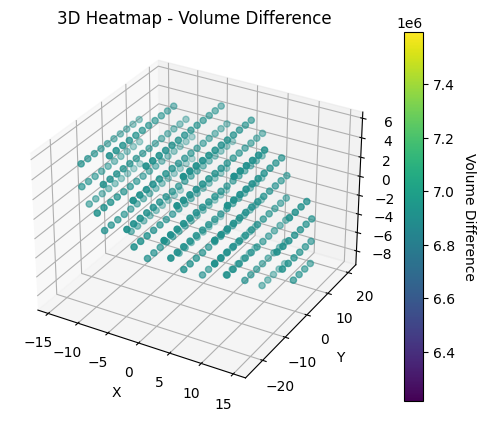

In [ ]:
compare_coordinates_heat_volume(load_obj("/content/drive/MyDrive/Science Fair 2024 Data/patient 040028-14/040028N-obj/040028_19020415_AX_T1_FL3D_msk/tinker_centered.obj"), list_of_coordinates2)

In [ ]:
list_of_coordinates2 = [
(186.05811252272048, -5.363363228699552, 55.24777816857997),
(187.05811252272048, -5.363363228699552, 54.24777816857997),
(186.05811252272048, -6.363363228699551, 55.24777816857997),
(186.05811252272048, -7.363363228699551, 54.24777816857997),
(187.05811252272048, -6.363363228699551, 54.24777816857997),
(189.05811252272048, -9.363363228699551, 54.24777816857997),
(181.05811252272048, -6.363363228699551, 56.24777816857997),
(182.05811252272048, -7.363363228699551, 56.24777816857997),
(181.05811252272048, -5.363363228699552, 55.24777816857997),
(184.05811252272048, -6.363363228699551, 55.24777816857997),
(183.05811252272048, -7.363363228699551, 55.24777816857997),
(184.05811252272048, -7.363363228699551, 54.24777816857997),
(183.05811252272048, -8.363363228699551, 54.24777816857997),
(182.05811252272048, -8.363363228699551, 55.24777816857997),
(188.05811252272048, -10.363363228699551, 54.24777816857997),
(189.05811252272048, -10.363363228699551, 54.24777816857997),
(187.05811252272048, -11.363363228699551, 54.24777816857997),
(187.05811252272048, -12.363363228699551, 54.24777816857997),
(185.05811252272048, -12.363363228699551, 54.24777816857997),
(185.05811252272048, -13.363363228699551, 56.24777816857997),
(182.05811252272048, -10.363363228699551, 56.24777816857997),
(184.05811252272048, -13.363363228699551, 55.24777816857997),
(184.05811252272048, -12.363363228699551, 54.24777816857997),
(183.05811252272048, -11.363363228699551, 54.24777816857997),
(182.05811252272048, -11.363363228699551, 55.24777816857997),
(184.05811252272048, -13.363363228699551, 54.24777816857997),
(185.05811252272048, -13.363363228699551, 53.24777816857997),
(187.05811252272048, -13.363363228699551, 53.24777816857997),
(188.05811252272048, -12.363363228699551, 53.24777816857997),
(189.05811252272048, -11.363363228699551, 53.24777816857997),
(188.05811252272048, -11.363363228699551, 53.24777816857997),
(173.05811252272048, -9.363363228699551, 57.24777816857997),
(179.05811252272048, -6.363363228699551, 56.24777816857997),
(175.05811252272048, -9.363363228699551, 56.24777816857997),
(174.05811252272048, -9.363363228699551, 56.24777816857997),
(179.05811252272048, -5.363363228699552, 55.24777816857997),
(173.05811252272048, -8.363363228699551, 57.24777816857997),
(175.05811252272048, -10.363363228699551, 57.24777816857997),
(174.05811252272048, -10.363363228699551, 57.24777816857997),
(174.05811252272048, -11.363363228699551, 57.24777816857997),
(174.05811252272048, -12.363363228699551, 57.24777816857997),
(173.05811252272048, -11.363363228699551, 57.24777816857997),
(176.05811252272048, -10.363363228699551, 56.24777816857997),
(175.05811252272048, -11.363363228699551, 56.24777816857997),
(183.05811252272048, -15.363363228699551, 56.24777816857997),
(182.05811252272048, -15.363363228699551, 56.24777816857997),
(181.05811252272048, -15.363363228699551, 56.24777816857997),
(183.05811252272048, -14.363363228699551, 55.24777816857997),
(181.05811252272048, -16.36336322869955, 55.24777816857997),
(182.05811252272048, -14.363363228699551, 55.24777816857997),
(181.05811252272048, -15.363363228699551, 55.24777816857997),
(183.05811252272048, -15.363363228699551, 54.24777816857997),
(182.05811252272048, -15.363363228699551, 54.24777816857997),
(184.05811252272048, -14.363363228699551, 54.24777816857997),
(189.05811252272048, -21.363363228699555, 54.24777816857997),
(185.05811252272048, -21.363363228699555, 54.24777816857997),
(187.05811252272048, -21.363363228699555, 54.24777816857997),
(181.05811252272048, -21.363363228699555, 55.24777816857997),
(181.05811252272048, -20.36336322869955, 55.24777816857997),
(181.05811252272048, -19.36336322869955, 55.24777816857997),
(182.05811252272048, -19.36336322869955, 54.24777816857997),
(184.05811252272048, -20.36336322869955, 54.24777816857997),
(189.05811252272048, -20.36336322869955, 53.24777816857997),
(187.05811252272048, -20.36336322869955, 53.24777816857997),
(185.05811252272048, -20.36336322869955, 53.24777816857997),
(188.05811252272048, -21.363363228699555, 53.24777816857997),
(179.05811252272048, -17.36336322869955, 56.24777816857997),
(189.05811252272048, -27.363363228699555, 56.24777816857997),
(180.05811252272048, -17.36336322869955, 55.24777816857997),
(189.05811252272048, -26.363363228699555, 55.24777816857997),
(174.05811252272048, -14.363363228699551, 57.24777816857997),
(189.05811252272048, -28.363363228699555, 57.24777816857997),
(175.05811252272048, -17.36336322869955, 57.24777816857997),
(175.05811252272048, -16.36336322869955, 56.24777816857997),
(174.05811252272048, -16.36336322869955, 57.24777816857997),
(177.05811252272048, -19.36336322869955, 57.24777816857997),
(179.05811252272048, -19.36336322869955, 56.24777816857997),
(180.05811252272048, -21.363363228699555, 56.24777816857997),
(179.05811252272048, -20.36336322869955, 56.24777816857997),
(180.05811252272048, -20.36336322869955, 56.24777816857997),
(178.05811252272048, -20.36336322869955, 57.24777816857997),
(179.05811252272048, -21.363363228699555, 56.24777816857997),
(178.05811252272048, -21.363363228699555, 57.24777816857997),
(180.05811252272048, -19.36336322869955, 55.24777816857997),
(175.05811252272048, -19.36336322869955, 57.24777816857997),
(185.05811252272048, -24.363363228699555, 55.24777816857997),
(186.05811252272048, -24.363363228699555, 55.24777816857997),
(186.05811252272048, -23.363363228699555, 54.24777816857997),
(188.05811252272048, -22.363363228699555, 54.24777816857997),
(183.05811252272048, -25.363363228699555, 57.24777816857997),
(181.05811252272048, -23.363363228699555, 57.24777816857997),
(182.05811252272048, -23.363363228699555, 57.24777816857997),
(183.05811252272048, -24.363363228699555, 57.24777816857997),
(182.05811252272048, -23.363363228699555, 56.24777816857997),
(184.05811252272048, -25.363363228699555, 56.24777816857997),
(183.05811252272048, -25.363363228699555, 56.24777816857997),
(182.05811252272048, -24.363363228699555, 56.24777816857997),
(183.05811252272048, -23.363363228699555, 55.24777816857997),
(183.05811252272048, -24.363363228699555, 55.24777816857997),
(186.05811252272048, -29.363363228699555, 57.24777816857997),
(187.05811252272048, -28.363363228699555, 57.24777816857997),
(186.05811252272048, -28.363363228699555, 57.24777816857997),
(185.05811252272048, -26.363363228699555, 57.24777816857997),
(185.05811252272048, -27.363363228699555, 57.24777816857997),
(187.05811252272048, -26.363363228699555, 55.24777816857997),
(186.05811252272048, -26.363363228699555, 56.24777816857997),
(187.05811252272048, -27.363363228699555, 56.24777816857997),
(186.05811252272048, -27.363363228699555, 56.24777816857997),
(181.05811252272048, -29.363363228699555, 57.24777816857997),
(184.05811252272048, -26.363363228699555, 57.24777816857997),
(181.05811252272048, -28.363363228699555, 57.24777816857997),
(180.05811252272048, -25.363363228699555, 57.24777816857997),
(179.05811252272048, -24.363363228699555, 57.24777816857997),
(179.05811252272048, -22.363363228699555, 57.24777816857997),
(180.05811252272048, -22.363363228699555, 57.24777816857997),
(180.05811252272048, -27.363363228699555, 57.24777816857997),
(-61.455819907279526, 0.6172510093004484, -0.040442451420029),
(-60.455819907279526, 1.6172510093004484, -0.040442451420029),
(-60.455819907279526, 0.6172510093004484, 0.959557548579971),
(-59.455819907279526, 1.6172510093004484, 0.959557548579971),
(-62.455819907279526, -1.3827489906995516, -0.040442451420029),
(-61.455819907279526, -1.3827489906995516, -0.040442451420029),
(-62.455819907279526, -2.382748990699552, 0.959557548579971),
(-60.455819907279526, -1.3827489906995516, 0.959557548579971),
(-61.455819907279526, -2.382748990699552, 0.959557548579971),
(-60.455819907279526, -0.3827489906995516, -1.040442451420029),
(-59.455819907279526, -0.3827489906995516, -2.040442451420029),
(-59.455819907279526, 0.6172510093004484, -1.040442451420029),
(-62.455819907279526, -4.382748990699552, -0.040442451420029),
(-62.455819907279526, -6.382748990699551, -1.040442451420029),
(-62.455819907279526, -5.382748990699552, -1.040442451420029),
(-62.455819907279526, -5.382748990699552, -2.040442451420029),
(-61.455819907279526, -4.382748990699552, -1.040442451420029),
(-60.455819907279526, -4.382748990699552, -1.040442451420029),
(-61.455819907279526, -5.382748990699552, -2.040442451420029),
(-59.455819907279526, -4.382748990699552, -2.040442451420029),
(-60.455819907279526, -5.382748990699552, -2.040442451420029),
(-65.45581990727952, -6.382748990699551, 0.959557548579971),
(-64.45581990727952, -6.382748990699551, -0.040442451420029),
(-64.45581990727952, -4.382748990699552, 0.959557548579971),
(-64.45581990727952, -5.382748990699552, 0.959557548579971),
(-64.45581990727952, -3.382748990699552, -0.040442451420029),
(-63.455819907279526, -5.382748990699552, -0.040442451420029),
(-63.455819907279526, -3.382748990699552, 0.959557548579971),
(-60.455819907279526, -0.3827489906995516, -3.040442451420029),
(-59.455819907279526, 0.6172510093004484, -4.040442451420029),
(-60.455819907279526, 0.6172510093004484, -3.040442451420029),
(-59.455819907279526, 0.6172510093004484, -3.040442451420029),
(-59.455819907279526, 1.6172510093004484, -3.040442451420029),
(-62.455819907279526, -2.382748990699552, -4.040442451420029),
(-60.455819907279526, -2.382748990699552, -3.040442451420029),
(-60.455819907279526, -1.3827489906995516, -4.040442451420029),
(-59.455819907279526, -0.3827489906995516, -4.040442451420029),
(-62.455819907279526, 1.6172510093004484, -5.040442451420029),
(-60.455819907279526, -0.3827489906995516, -5.040442451420029),
(-61.455819907279526, -1.3827489906995516, -5.040442451420029),
(-66.45581990727952, -2.382748990699552, -4.040442451420029),
(-66.45581990727952, -1.3827489906995516, -5.040442451420029),
(-64.45581990727952, -0.3827489906995516, -5.040442451420029),
(-64.45581990727952, 0.6172510093004484, -6.040442451420029),
(-63.455819907279526, 1.6172510093004484, -6.040442451420029),
(-61.455819907279526, -3.382748990699552, -3.040442451420029),
(-62.455819907279526, -4.382748990699552, -3.040442451420029),
(-62.455819907279526, -3.382748990699552, -3.040442451420029),
(-60.455819907279526, -4.382748990699552, -3.040442451420029),
(-64.45581990727952, -6.382748990699551, -3.040442451420029),
(-64.45581990727952, -5.382748990699552, -3.040442451420029),
(-65.45581990727952, -5.382748990699552, -3.040442451420029),
(-64.45581990727952, -4.382748990699552, -4.040442451420029),
(-65.45581990727952, -4.382748990699552, -4.040442451420029),
(-73.45581990727952, -1.3827489906995516, -2.040442451420029),
(-74.45581990727952, -1.3827489906995516, -2.040442451420029),
(-73.45581990727952, 0.6172510093004484, -2.040442451420029),
(-70.45581990727952, -0.3827489906995516, -3.040442451420029),
(-70.45581990727952, 0.6172510093004484, -3.040442451420029),
(-70.45581990727952, 1.6172510093004484, -4.040442451420029),
(-69.45581990727952, -0.3827489906995516, -4.040442451420029),
(-69.45581990727952, 0.6172510093004484, -4.040442451420029),
(-68.45581990727952, -0.3827489906995516, -4.040442451420029),
(-69.45581990727952, -1.3827489906995516, -3.040442451420029),
(-69.45581990727952, -2.382748990699552, -3.040442451420029),
(-67.45581990727952, -2.382748990699552, -4.040442451420029),
(-68.45581990727952, -1.3827489906995516, -4.040442451420029),
(-68.45581990727952, -2.382748990699552, -4.040442451420029),
(-68.45581990727952, 0.6172510093004484, -6.040442451420029),
(-69.45581990727952, 1.6172510093004484, -6.040442451420029),
(-68.45581990727952, -0.3827489906995516, -5.040442451420029),
(-67.45581990727952, -0.3827489906995516, -5.040442451420029),
(-70.45581990727952, 1.6172510093004484, -5.040442451420029),
(-73.45581990727952, -2.382748990699552, -3.040442451420029),
(-74.45581990727952, -2.382748990699552, -3.040442451420029),
(-72.45581990727952, -1.3827489906995516, -3.040442451420029),
(-71.45581990727952, 0.6172510093004484, -3.040442451420029),
(-72.45581990727952, 0.6172510093004484, -3.040442451420029),
(-71.45581990727952, 1.6172510093004484, -4.040442451420029),
(-74.45581990727952, -3.382748990699552, -3.040442451420029),
(-68.45581990727952, -3.382748990699552, -3.040442451420029),
(-67.45581990727952, -3.382748990699552, -3.040442451420029),
(-62.455819907279526, -10.38274899069955, -1.040442451420029),
(-65.45581990727952, -7.382748990699551, 0.959557548579971),
(-63.455819907279526, -10.38274899069955, -0.040442451420029),
(-63.455819907279526, -7.382748990699551, -0.040442451420029),
(-64.45581990727952, -7.382748990699551, 0.959557548579971),
(-64.45581990727952, -10.38274899069955, -2.040442451420029),
(-64.45581990727952, -9.38274899069955, -2.040442451420029),
(-63.455819907279526, -8.38274899069955, -2.040442451420029),
(-63.455819907279526, -10.38274899069955, -2.040442451420029),
(-66.45581990727952, -14.382748990699554, 0.959557548579971),
(-65.45581990727952, -14.382748990699554, -0.040442451420029),
(-64.45581990727952, -12.38274899069955, 0.959557548579971),
(-63.455819907279526, -12.38274899069955, -0.040442451420029),
(-65.45581990727952, -11.38274899069955, 0.959557548579971),
(-66.45581990727952, -12.38274899069955, 0.959557548579971),
(-65.45581990727952, -14.382748990699554, -1.040442451420029),
(-66.45581990727952, -14.382748990699554, -2.040442451420029),
(-63.455819907279526, -12.38274899069955, -1.040442451420029),
(-63.455819907279526, -11.38274899069955, -1.040442451420029),
(-64.45581990727952, -12.38274899069955, -2.040442451420029),
(-64.45581990727952, -11.38274899069955, -2.040442451420029),
(-66.45581990727952, -12.38274899069955, -2.040442451420029),
(-65.45581990727952, -10.38274899069955, -3.040442451420029),
(-65.45581990727952, -9.38274899069955, -3.040442451420029),
(-64.45581990727952, -8.38274899069955, -3.040442451420029),
(-66.45581990727952, -11.38274899069955, -3.040442451420029),
(-67.45581990727952, -14.382748990699554, 0.959557548579971),
(-67.45581990727952, -13.38274899069955, 0.959557548579971),
(-67.45581990727952, -13.38274899069955, -2.040442451420029),
(-67.45581990727952, -12.38274899069955, -2.040442451420029),
(-68.45581990727952, -14.382748990699554, -2.040442451420029),
(-69.45581990727952, -14.382748990699554, -2.040442451420029),
(-70.45581990727952, -13.38274899069955, -2.040442451420029),
(-67.45581990727952, -17.382748990699554, -0.040442451420029),
(-69.45581990727952, -17.382748990699554, -0.040442451420029),
(-70.45581990727952, -17.382748990699554, -0.040442451420029),
(-69.45581990727952, -17.382748990699554, 0.959557548579971),
(-70.45581990727952, -17.382748990699554, -1.040442451420029),
(-70.45581990727952, -16.382748990699554, -2.040442451420029),
(-69.45581990727952, -15.382748990699554, -2.040442451420029),
(-67.45581990727952, -16.382748990699554, -1.040442451420029),
(-72.45581990727952, -18.382748990699554, -0.040442451420029),
(-71.45581990727952, -17.382748990699554, -0.040442451420029),
(-72.45581990727952, -17.382748990699554, -1.040442451420029),
(-73.45581990727952, -15.382748990699554, -2.040442451420029),
(-73.45581990727952, -17.382748990699554, -1.040442451420029),
(-73.45581990727952, -18.382748990699554, -0.040442451420029),
(-69.45581990727952, -19.382748990699554, 0.959557548579971),
(-70.45581990727952, -19.382748990699554, -0.040442451420029),
(-70.45581990727952, -20.382748990699554, 0.959557548579971),
(-71.45581990727952, -21.382748990699554, 0.959557548579971),
(-71.45581990727952, -20.382748990699554, 0.959557548579971),
(-58.455819907279526, 0.6172510093004484, -2.040442451420029),
(-72.45581990727952, -21.382748990699554, -0.040442451420029),
(-72.45581990727952, -20.382748990699554, -0.040442451420029),
(-71.45581990727952, -19.382748990699554, -0.040442451420029),
(-72.45581990727952, -22.382748990699554, 0.959557548579971),
(-74.45581990727952, -21.382748990699554, -0.040442451420029),
(-74.45581990727952, -22.382748990699554, 0.959557548579971),
(-71.45581990727952, -14.382748990699554, -2.040442451420029),
(-72.45581990727952, -14.382748990699554, -2.040442451420029),
(-74.45581990727952, -14.382748990699554, -2.040442451420029),
(-70.45581990727952, -12.38274899069955, -3.040442451420029),
(-68.45581990727952, -13.38274899069955, -3.040442451420029),
(-68.45581990727952, -12.38274899069955, -3.040442451420029),
(-67.45581990727952, -11.38274899069955, -3.040442451420029),
(-69.45581990727952, -13.38274899069955, -3.040442451420029),
(-71.45581990727952, -13.38274899069955, -3.040442451420029),
(-72.45581990727952, -13.38274899069955, -3.040442451420029),
(-74.45581990727952, -13.38274899069955, -3.040442451420029),
(-73.45581990727952, -14.382748990699554, -3.040442451420029),
(-66.45581990727952, -15.382748990699554, 0.959557548579971),
(-65.45581990727952, -15.382748990699554, -0.040442451420029),
(-66.45581990727952, -16.382748990699554, -0.040442451420029),
(-65.45581990727952, -15.382748990699554, -1.040442451420029),
(-66.45581990727952, -15.382748990699554, -2.040442451420029),
(-66.45581990727952, -16.382748990699554, -1.040442451420029),
(-69.45581990727952, -16.382748990699554, 0.959557548579971),
(-70.45581990727952, -16.382748990699554, 0.959557548579971),
(-67.45581990727952, -16.382748990699554, 0.959557548579971),
(-68.45581990727952, -15.382748990699554, 0.959557548579971),
(-70.45581990727952, -15.382748990699554, 0.959557548579971),
(245.65093112272046, 10.93663677130045, -0.8897619044200291),
(242.65093112272046, 9.93663677130045, 0.11023809557997089),
(242.65093112272046, 10.93663677130045, -0.8897619044200291),
(245.65093112272046, 11.93663677130045, -1.8897619044200291),
(240.65093112272046, 23.93663677130045, 2.110238095579971),
(247.65093112272046, 10.93663677130045, -2.889761904420029),
(246.65093112272046, 11.93663677130045, -2.889761904420029),
(245.65093112272046, 12.93663677130045, -2.889761904420029),
(248.65093112272046, 10.93663677130045, -3.889761904420029),
(247.65093112272046, 12.93663677130045, -4.889761904420029),
(248.65093112272046, 12.93663677130045, -3.889761904420029),
(249.65093112272046, 13.93663677130045, -3.889761904420029),
(246.65093112272046, 13.93663677130045, -4.889761904420029),
(245.65093112272046, 13.93663677130045, -3.889761904420029),
(249.65093112272046, 28.93663677130045, 1.1102380955799709),
(249.65093112272046, 27.93663677130045, 2.110238095579971),
(249.65093112272046, 24.93663677130045, -0.8897619044200291),
(240.65093112272046, 22.93663677130045, 1.1102380955799709),
(239.65093112272046, 22.93663677130045, 1.1102380955799709),
(239.65093112272046, 23.93663677130045, 2.110238095579971),
(238.65093112272046, 22.93663677130045, 2.110238095579971),
(248.65093112272046, 22.32063677130045, -1.8897619044200291),
(248.55493112272046, 22.32063677130045, -1.793761904420029),
(248.65093112272046, 22.32063677130045, -1.793761904420029),
(247.65093112272046, 10.93663677130045, -4.889761904420029),
(245.65093112272046, 11.93663677130045, -3.889761904420029),
(244.65093112272046, 11.93663677130045, -1.8897619044200291),
(249.65093112272046, 20.93663677130045, -2.889761904420029),
(243.65093112272046, 12.93663677130045, -1.8897619044200291),
(243.65093112272046, 13.93663677130045, -1.8897619044200291),
(249.65093112272046, 20.93663677130045, -4.889761904420029),
(244.65093112272046, 13.93663677130045, -2.889761904420029),
(249.65093112272046, 20.93663677130045, -1.8897619044200291),
(249.65093112272046, 14.93663677130045, -4.889761904420029),
(246.65093112272046, 9.93663677130045, -4.889761904420029),
(246.65093112272046, 9.93663677130045, -2.889761904420029),
(246.65093112272046, 8.93663677130045, -3.889761904420029),
(247.65093112272046, 9.93663677130045, -3.889761904420029),
(248.65093112272046, 9.93663677130045, -2.889761904420029),
(248.65093112272046, 8.93663677130045, -1.8897619044200291),
(249.65093112272046, 8.93663677130045, -2.889761904420029),
(249.65093112272046, 8.93663677130045, -1.8897619044200291),
(245.65093112272046, 9.93663677130045, -3.889761904420029),
(238.65093112272046, 12.93663677130045, 0.11023809557997089),
(239.65093112272046, 10.93663677130045, 0.11023809557997089),
(239.65093112272046, 11.93663677130045, 0.11023809557997089),
(240.65093112272046, 11.93663677130045, -0.8897619044200291),
(239.65093112272046, 12.93663677130045, -0.8897619044200291),
(240.65093112272046, 10.93663677130045, -0.8897619044200291),
(235.65093112272046, 11.93663677130045, 2.110238095579971),
(236.65093112272046, 12.93663677130045, 2.110238095579971),
(236.65093112272046, 11.93663677130045, 1.1102380955799709),
(237.65093112272046, 7.936636771300449, 0.11023809557997089),
(240.65093112272046, 9.93663677130045, 0.11023809557997089),
(235.65093112272046, 7.936636771300449, 1.1102380955799709),
(234.65093112272046, 7.936636771300449, 1.1102380955799709),
(235.65093112272046, 8.93663677130045, 2.110238095579971),
(236.65093112272046, 8.93663677130045, 1.1102380955799709),
(236.65093112272046, 7.936636771300449, 1.1102380955799709),
(233.65093112272046, 6.936636771300448, 2.110238095579971),
(234.65093112272046, 8.93663677130045, 2.110238095579971),
(233.65093112272046, 7.936636771300449, 2.110238095579971),
(242.65093112272046, 18.93663677130045, -0.8897619044200291),
(242.65093112272046, 20.93663677130045, -0.8897619044200291),
(242.65093112272046, 19.93663677130045, -0.8897619044200291),
(241.65093112272046, 20.93663677130045, 0.11023809557997089),
(241.65093112272046, 17.93663677130045, -0.8897619044200291),
(241.65093112272046, 14.93663677130045, -0.8897619044200291),
(247.65093112272046, 21.93663677130045, -2.889761904420029),
(248.65093112272046, 30.93663677130045, 1.1102380955799709),
(248.65093112272046, 21.93663677130045, -1.8897619044200291),
(246.65093112272046, 30.93663677130045, 1.1102380955799709),
(248.65093112272046, 20.93663677130045, -2.889761904420029),
(248.65093112272046, 21.93663677130045, -2.889761904420029),
(246.65093112272046, 29.93663677130045, 2.110238095579971),
(247.65093112272046, 28.93663677130045, 2.110238095579971),
(248.65093112272046, 28.93663677130045, 2.110238095579971),
(249.65093112272046, 29.93663677130045, 1.1102380955799709),
(248.65093112272046, 29.93663677130045, 2.110238095579971),
(245.65093112272046, 21.93663677130045, -2.889761904420029),
(245.65093112272046, 29.93663677130045, 2.110238095579971),
(245.65093112272046, 29.93663677130045, 1.1102380955799709),
(246.65093112272046, 20.93663677130045, -3.889761904420029),
(247.65093112272046, 21.93663677130045, -3.889761904420029),
(245.65093112272046, 19.93663677130045, -3.889761904420029),
(248.65093112272046, 21.93663677130045, -4.889761904420029),
(248.65093112272046, 29.93663677130045, 0.11023809557997089),
(247.65093112272046, 20.93663677130045, -4.889761904420029),
(246.65093112272046, 29.93663677130045, 0.11023809557997089),
(245.65093112272046, 29.93663677130045, 0.11023809557997089),
(245.65093112272046, 28.93663677130045, -0.8897619044200291),
(246.65093112272046, 21.93663677130045, -3.889761904420029),
(243.65093112272046, 18.93663677130045, -2.889761904420029),
(244.65093112272046, 19.93663677130045, -2.889761904420029),
(243.65093112272046, 19.93663677130045, -1.8897619044200291),
(244.65093112272046, 20.93663677130045, -1.8897619044200291),
(243.65093112272046, 26.93663677130045, 1.1102380955799709),
(242.65093112272046, 26.93663677130045, 2.110238095579971),
(242.65093112272046, 18.93663677130045, -1.8897619044200291),
(244.65093112272046, 21.93663677130045, -1.8897619044200291),
(243.65093112272046, 27.93663677130045, 2.110238095579971),
(243.65093112272046, 20.93663677130045, -1.8897619044200291),
(244.65093112272046, 28.93663677130045, 2.110238095579971),
(244.65093112272046, 27.93663677130045, 1.1102380955799709),
(244.65093112272046, 26.93663677130045, -0.8897619044200291),
(243.65093112272046, 26.93663677130045, 0.11023809557997089),
(247.65093112272046, 14.93663677130045, -4.889761904420029),
(245.65093112272046, 14.93663677130045, -2.889761904420029),
(244.65093112272046, 27.93663677130045, -0.8897619044200291),
(245.65093112272046, 15.93663677130045, -2.889761904420029),
(243.65093112272046, 27.93663677130045, 0.11023809557997089),
(244.65093112272046, 28.93663677130045, 0.11023809557997089),
(246.65093112272046, 15.93663677130045, -3.889761904420029),
(245.65093112272046, 16.93663677130045, -3.889761904420029),
(248.65093112272046, 24.93663677130045, -1.793761904420029),
(248.65093112272046, 24.93663677130045, -0.8897619044200291),
(247.65093112272046, 24.93663677130045, -0.8897619044200291),
(242.65093112272046, 14.93663677130045, -1.8897619044200291),
(242.65093112272046, 17.93663677130045, -1.8897619044200291),
(243.65093112272046, 16.93663677130045, -1.8897619044200291),
(248.55493112272046, 24.93663677130045, -1.793761904420029),
(244.65093112272046, 16.93663677130045, -2.889761904420029),
(243.65093112272046, 17.93663677130045, -2.889761904420029),
(246.65093112272046, 24.93663677130045, -0.8897619044200291),
(245.65093112272046, 23.93663677130045, -0.8897619044200291),
(245.65093112272046, 22.93663677130045, -0.8897619044200291),
(248.65093112272046, 24.032636771300446, -1.793761904420029),
(240.65093112272046, 18.93663677130045, -0.8897619044200291),
(239.65093112272046, 18.93663677130045, 0.11023809557997089),
(239.65093112272046, 19.93663677130045, 0.11023809557997089),
(240.65093112272046, 20.93663677130045, 0.11023809557997089),
(241.65093112272046, 24.93663677130045, 2.110238095579971),
(237.65093112272046, 19.93663677130045, 2.110238095579971),
(238.65093112272046, 20.93663677130045, 2.110238095579971),
(241.65093112272046, 23.93663677130045, 1.1102380955799709),
(240.65093112272046, 21.93663677130045, 0.11023809557997089),
(239.65093112272046, 21.93663677130045, 1.1102380955799709),
(241.65093112272046, 24.93663677130045, 1.1102380955799709),
(241.65093112272046, 25.93663677130045, 2.110238095579971),
(241.65093112272046, 22.93663677130045, 0.11023809557997089),
(244.65093112272046, 22.93663677130045, -0.8897619044200291),
(238.65093112272046, 15.93663677130045, 1.1102380955799709),
(237.65093112272046, 15.93663677130045, 1.1102380955799709),
(237.65093112272046, 15.93663677130045, 2.110238095579971),
(242.65093112272046, 22.93663677130045, -0.8897619044200291),
(243.65093112272046, 23.93663677130045, -0.8897619044200291),
(238.65093112272046, 16.93663677130045, 1.1102380955799709),
(242.65093112272046, 24.93663677130045, -0.8897619044200291),
(241.65093112272046, 24.93663677130045, 0.11023809557997089),
(238.65093112272046, 14.93663677130045, 0.11023809557997089),
(237.65093112272046, 14.93663677130045, 0.11023809557997089),
(238.65093112272046, 15.93663677130045, 0.11023809557997089),
(239.65093112272046, 15.93663677130045, -0.8897619044200291),
(240.65093112272046, 16.93663677130045, -0.8897619044200291),
(246.65093112272046, 22.93663677130045, -2.889761904420029),
(248.65093112272046, 23.93663677130045, -1.8897619044200291),
(248.65093112272046, 24.93663677130045, -1.8897619044200291),
(236.65093112272046, 14.93663677130045, 1.1102380955799709),
(242.65093112272046, 12.93663677130045, -0.8897619044200291),
(242.65093112272046, 13.93663677130045, -0.8897619044200291),
(244.65093112272046, 10.93663677130045, -0.8897619044200291),
(247.65093112272046, 25.93663677130045, -1.8897619044200291),
(247.65093112272046, 24.93663677130045, -2.889761904420029),
(246.65093112272046, 25.93663677130045, -1.8897619044200291),
(246.65093112272046, 24.93663677130045, -2.889761904420029),
(245.65093112272046, 23.93663677130045, -2.889761904420029),
(248.65093112272046, 22.93663677130045, -3.889761904420029),
(244.65093112272046, 23.93663677130045, -1.8897619044200291),
(-95.31632805727952, 15.111629650500447, -175.17759705142),
(-90.31632805727952, 11.111629650500449, -175.17759705142),
(-94.31632805727952, 14.111629650500449, -175.17759705142),
(-91.31632805727952, 12.111629650500449, -175.17759705142),
(-83.31632805727952, 2.1116296505004484, -167.17759705142),
(-91.31632805727952, 13.111629650500449, -175.17759705142),
(-92.31632805727952, 14.111629650500449, -175.17759705142),
(-98.31632805727952, 13.111629650500449, -175.17759705142),
(-96.31632805727952, 13.111629650500449, -175.17759705142),
(-95.31632805727952, 14.111629650500449, -175.17759705142),
(-98.31632805727952, 7.111629650500449, -175.17759705142),
(-90.31632805727952, 2.1116296505004484, -175.17759705142),
(-97.31632805727952, 6.111629650500448, -175.17759705142),
(-91.31632805727952, 1.1116296505004484, -175.17759705142),
(-91.31632805727952, 0.11162965050044849, -175.17759705142),
(-94.31632805727952, 0.11162965050044849, -175.17759705142),
(-95.31632805727952, 1.1116296505004484, -175.17759705142),
(-97.31632805727952, 1.1116296505004484, -175.17759705142),
(-83.31632805727952, 1.1116296505004484, -167.17759705142),
(-84.31632805727952, 0.15962965050044853, -168.17759705142),
(-84.31632805727952, 2.1116296505004484, -168.17759705142),
(-86.31632805727952, 11.111629650500449, -168.17759705142),
(-89.31632805727952, 13.111629650500449, -167.17759705142),
(-90.31632805727952, 14.111629650500449, -167.17759705142),
(-88.31632805727952, 13.111629650500449, -168.17759705142),
(-88.31632805727952, 12.111629650500449, -168.17759705142),
(-88.31632805727952, 11.111629650500449, -167.17759705142),
(-88.31632805727952, 12.111629650500449, -167.17759705142),
(-87.31632805727952, 11.111629650500449, -167.17759705142),
(-87.31632805727952, 12.111629650500449, -168.17759705142),
(-88.31632805727952, 11.111629650500449, -169.17759705142),
(-89.31632805727952, 12.111629650500449, -169.17759705142),
(-89.31632805727952, 13.111629650500449, -169.17759705142),
(-87.31632805727952, 11.111629650500449, -169.17759705142),
(-83.31632805727952, 7.111629650500449, -168.17759705142),
(-86.31632805727952, 10.111629650500449, -168.17759705142),
(-96.31632805727952, 19.111629650500447, -169.17759705142),
(-86.31632805727952, 9.111629650500449, -169.17759705142),
(-96.31632805727952, 19.111629650500447, -167.17759705142),
(-83.31632805727952, 8.111629650500449, -168.17759705142),
(-85.31632805727952, 10.111629650500449, -168.17759705142),
(-84.31632805727952, 8.111629650500449, -169.17759705142),
(-85.31632805727952, 9.111629650500449, -169.17759705142),
(-95.31632805727952, 19.111629650500447, -167.17759705142),
(-87.31632805727952, 10.111629650500449, -167.17759705142),
(-97.31632805727952, 19.111629650500447, -170.17759705142),
(-97.31632805727952, 22.111629650500447, -169.17759705142),
(-96.31632805727952, 21.111629650500447, -169.17759705142),
(-97.31632805727952, 21.111629650500447, -170.17759705142),
(-87.31632805727952, 10.111629650500449, -169.17759705142),
(-90.31632805727952, 8.111629650500449, -170.17759705142),
(-94.31632805727952, 17.111629650500447, -167.17759705142),
(-88.31632805727952, 8.111629650500449, -170.17759705142),
(-88.31632805727952, 7.111629650500449, -170.17759705142),
(-94.31632805727952, 18.111629650500447, -167.17759705142),
(-89.31632805727952, 7.111629650500449, -170.17759705142),
(-94.31632805727952, 16.111629650500447, -168.17759705142),
(-93.31632805727952, 16.111629650500447, -167.17759705142),
(-93.31632805727952, 15.111629650500447, -167.17759705142),
(-90.31632805727952, 12.111629650500449, -174.17759705142),
(-90.31632805727952, 12.111629650500449, -173.17759705142),
(-90.31632805727952, 11.111629650500449, -172.17759705142),
(-89.31632805727952, 11.111629650500449, -173.17759705142),
(-89.31632805727952, 11.111629650500449, -174.17759705142),
(-91.31632805727952, 15.111629650500447, -167.17759705142),
(-91.31632805727952, 16.111629650500447, -168.17759705142),
(-92.31632805727952, 15.111629650500447, -167.17759705142),
(-93.31632805727952, 16.111629650500447, -168.17759705142),
(-90.31632805727952, 13.111629650500449, -174.17759705142),
(-90.31632805727952, 13.111629650500449, -173.17759705142),
(-94.31632805727952, 16.111629650500447, -169.17759705142),
(-94.31632805727952, 15.111629650500447, -170.17759705142),
(-89.31632805727952, 11.111629650500449, -172.17759705142),
(-95.22032805727953, 15.111629650500447, -171.08159705142),
(-94.31632805727952, 17.111629650500447, -169.17759705142),
(-86.31632805727952, 7.111629650500449, -173.17759705142),
(-93.31632805727952, 15.111629650500447, -169.17759705142),
(-86.31632805727952, 7.111629650500449, -171.17759705142),
(-86.31632805727952, 8.111629650500449, -172.17759705142),
(-95.22032805727953, 15.015629650500449, -171.08159705142),
(-90.31632805727952, 9.111629650500449, -171.17759705142),
(-91.31632805727952, 15.111629650500447, -169.17759705142),
(-90.31632805727952, 10.111629650500449, -171.17759705142),
(-96.31632805727952, 18.111629650500447, -168.17759705142),
(-87.31632805727952, 9.111629650500449, -172.17759705142),
(-95.31632805727952, 16.111629650500447, -170.17759705142),
(-95.31632805727952, 17.111629650500447, -170.17759705142),
(-89.31632805727952, 10.111629650500449, -171.17759705142),
(-88.31632805727952, 9.111629650500449, -171.17759705142),
(-95.31632805727952, 17.111629650500447, -168.17759705142),
(-95.31632805727952, 18.111629650500447, -168.17759705142),
(-87.31632805727952, 8.111629650500449, -171.17759705142),
(-87.31632805727952, 7.111629650500449, -171.17759705142),
(-96.31632805727952, 17.111629650500447, -170.17759705142),
(-87.31632805727952, 8.111629650500449, -172.17759705142),
(-96.31632805727952, 16.207629650500447, -171.08159705142),
(-97.26832805727953, 16.207629650500447, -171.08159705142),
(-95.22032805727953, 14.49562965050045, -171.08159705142),
(-97.26832805727953, 14.49562965050045, -171.08159705142),
(-93.31632805727952, 15.111629650500447, -172.17759705142),
(-94.31632805727952, 15.111629650500447, -171.17759705142),
(-94.31632805727952, 16.111629650500447, -171.17759705142),
(-94.31632805727952, 15.111629650500447, -174.17759705142),
(-92.31632805727952, 15.111629650500447, -173.17759705142),
(-92.31632805727952, 15.111629650500447, -174.17759705142),
(-93.31632805727952, 15.111629650500447, -174.17759705142),
(-92.31632805727952, 16.111629650500447, -173.17759705142),
(-93.31632805727952, 16.111629650500447, -174.17759705142),
(-94.31632805727952, 17.111629650500447, -174.17759705142),
(-94.31632805727952, 18.111629650500447, -173.17759705142),
(-95.31632805727952, 18.111629650500447, -172.17759705142),
(-95.31632805727952, 17.111629650500447, -171.17759705142),
(-97.31632805727952, 18.111629650500447, -172.17759705142),
(-97.31632805727952, 17.111629650500447, -171.17759705142),
(-89.31632805727952, 10.111629650500449, -173.17759705142),
(-98.31632805727952, 17.111629650500447, -172.17759705142),
(-97.31632805727952, 16.543629650500446, -171.17759705142),
(-89.31632805727952, 7.111629650500449, -173.17759705142),
(-88.31632805727952, 9.111629650500449, -173.17759705142),
(-88.31632805727952, 8.111629650500449, -173.17759705142),
(-95.31632805727952, 15.111629650500447, -171.17759705142),
(-97.26832805727953, 16.111629650500447, -171.17759705142),
(-97.26832805727953, 14.49562965050045, -171.17759705142),
(-95.31632805727952, 14.49562965050045, -171.17759705142),
(-87.31632805727952, 7.111629650500449, -173.17759705142),
(-91.31632805727952, 14.111629650500449, -167.17759705142),
(-97.31632805727952, 16.111629650500447, -171.17759705142),
(-84.98032805727952, 2.1116296505004484, -168.17759705142),
(-94.31632805727952, 14.111629650500449, -170.17759705142),
(-94.31632805727952, 14.111629650500449, -169.17759705142),
(-86.31632805727952, 2.1116296505004484, -168.17759705142),
(-94.31632805727952, 11.111629650500449, -169.17759705142),
(-94.31632805727952, 12.111629650500449, -170.17759705142),
(-94.31632805727952, 13.111629650500449, -170.17759705142),
(-92.31632805727952, 11.111629650500449, -170.17759705142),
(-85.31632805727952, 1.1116296505004484, -169.17759705142),
(-85.31632805727952, 2.1116296505004484, -170.17759705142),
(-84.31632805727952, 2.1116296505004484, -170.17759705142),
(-91.31632805727952, 7.111629650500449, -170.17759705142),
(-91.31632805727952, 7.111629650500449, -169.17759705142),
(-83.31632805727952, 1.1116296505004484, -169.17759705142),
(-83.31632805727952, 2.1116296505004484, -170.17759705142),
(-92.31632805727952, 7.111629650500449, -170.17759705142),
(-92.31632805727952, 9.111629650500449, -170.17759705142),
(-93.31632805727952, 10.111629650500449, -169.17759705142),
(-93.31632805727952, 10.111629650500449, -170.17759705142),
(-92.31632805727952, 10.111629650500449, -170.17759705142),
(-91.31632805727952, 9.111629650500449, -169.17759705142),
(-92.31632805727952, 10.111629650500449, -169.17759705142),
(-98.31632805727952, 16.111629650500447, -172.17759705142),
(-91.31632805727952, 11.111629650500449, -171.17759705142),
(-93.31632805727952, 13.111629650500449, -171.17759705142),
(-91.31632805727952, 12.111629650500449, -172.17759705142),
(-93.31632805727952, 14.111629650500449, -172.17759705142),
(-98.31632805727952, 15.111629650500447, -173.17759705142),
(-93.31632805727952, 14.111629650500449, -171.17759705142),
(-91.31632805727952, 13.111629650500449, -172.17759705142),
(-95.31632805727952, 16.111629650500447, -174.17759705142),
(-96.31632805727952, 16.111629650500447, -174.17759705142),
(-96.31632805727952, 15.111629650500447, -174.17759705142),
(-91.31632805727952, 14.111629650500449, -173.17759705142),
(-96.31632805727952, 18.111629650500447, -173.17759705142),
(-96.31632805727952, 17.111629650500447, -174.17759705142),
(-98.31632805727952, 14.111629650500449, -174.17759705142),
(-96.31632805727952, 14.111629650500449, -174.17759705142),
(-82.31632805727952, 3.111629650500448, -172.17759705142),
(-98.31632805727952, 14.111629650500449, -172.17759705142),
(-82.31632805727952, 1.1116296505004484, -172.17759705142),
(-98.31632805727952, 13.111629650500449, -171.17759705142),
(-97.31632805727952, 14.111629650500449, -171.17759705142),
(-98.31632805727952, 12.111629650500449, -171.17759705142),
(-91.31632805727952, 10.111629650500449, -171.17759705142),
(-83.31632805727952, 4.111629650500448, -172.17759705142),
(-83.31632805727952, 3.111629650500448, -168.17759705142),
(-84.31632805727952, 4.111629650500448, -171.17759705142),
(-83.31632805727952, 3.111629650500448, -167.17759705142),
(-83.31632805727952, 5.111629650500448, -172.17759705142),
(-84.31632805727952, 5.111629650500448, -171.17759705142),
(-83.31632805727952, 6.111629650500448, -167.17759705142),
(-84.31632805727952, 3.111629650500448, -174.17759705142),
(-83.31632805727952, 3.111629650500448, -173.17759705142),
(-85.81632805727952, 4.611629650500448, -170.17759705142),
(-86.31632805727952, 5.111629650500448, -174.17759705142),
(-86.31632805727952, 6.111629650500448, -173.17759705142),
(-83.31632805727952, 4.111629650500448, -173.17759705142),
(-85.31632805727952, 6.111629650500448, -173.17759705142),
(-84.31632805727952, 4.111629650500448, -174.17759705142),
(-85.31632805727952, 3.111629650500448, -169.17759705142),
(-85.31632805727952, 5.111629650500448, -174.17759705142),
(-86.31632805727952, 4.111629650500448, -170.17759705142),
(-86.31632805727952, 4.111629650500448, -169.17759705142),
(-84.31632805727952, 3.111629650500448, -169.17759705142),
(-90.31632805727952, 6.111629650500448, -169.17759705142),
(-87.31632805727952, 4.111629650500448, -170.17759705142),
(-87.31632805727952, 5.111629650500448, -169.17759705142),
(-87.31632805727952, 4.111629650500448, -169.17759705142),
(-88.31632805727952, 5.111629650500448, -170.17759705142),
(-88.31632805727952, 6.111629650500448, -169.17759705142),
(-89.31632805727952, 6.111629650500448, -169.17759705142),
(-88.31632805727952, 6.111629650500448, -170.17759705142),
(-89.31632805727952, 6.111629650500448, -174.17759705142),
(-87.31632805727952, 6.111629650500448, -174.17759705142),
(-83.31632805727952, 1.1116296505004484, -171.17759705142),
(-83.31632805727952, 0.11162965050044849, -172.17759705142),
(-86.31632805727952, -0.8883703494995516, -173.17759705142),
(-85.31632805727952, 0.11162965050044849, -173.17759705142),
(-86.31632805727952, 0.11162965050044849, -174.17759705142),
(-86.31632805727952, 1.1116296505004484, -174.17759705142),
(-85.31632805727952, 2.1116296505004484, -174.17759705142),
(-84.31632805727952, 2.1116296505004484, -173.17759705142),
(-84.31632805727952, 0.11162965050044849, -173.17759705142),
(-83.31632805727952, 1.1116296505004484, -173.17759705142),
(-87.31632805727952, -0.8883703494995516, -174.17759705142),
(-89.31632805727952, 2.1116296505004484, -174.17759705142),
(-90.31632805727952, 0.11162965050044849, -174.17759705142),
(-90.31632805727952, 1.1116296505004484, -174.17759705142),
(-98.31632805727952, 6.111629650500448, -173.17759705142),
(-98.31632805727952, 6.111629650500448, -174.17759705142),
(-82.31632805727952, 1.1116296505004484, -170.17759705142),
(-91.31632805727952, -0.8883703494995516, -174.17759705142),
(-93.31632805727952, -0.8883703494995516, -174.17759705142),
(-94.31632805727952, -0.8883703494995516, -173.17759705142),
(-94.31632805727952, -0.8883703494995516, -174.17759705142),
(-98.31632805727952, 0.11162965050044849, -171.17759705142),
(-98.31632805727952, 0.11162965050044849, -172.17759705142),
(-96.31632805727952, -0.8883703494995516, -172.17759705142),
(-95.31632805727952, -0.8883703494995516, -172.17759705142),
(-97.31632805727952, 0.11162965050044849, -173.17759705142),
(-96.31632805727952, 0.11162965050044849, -173.17759705142),
(-95.31632805727952, 0.11162965050044849, -173.17759705142),
(-98.31632805727952, 1.1116296505004484, -173.17759705142),
(-97.31632805727952, 0.11162965050044849, -174.17759705142),
(-95.31632805727952, 0.11162965050044849, -174.17759705142),
(-98.31632805727952, 1.1116296505004484, -174.17759705142),
(-18.252920777279524, -2.4333632286995517, 5.989557548579971),
(-18.252920777279524, -3.4333632286995517, 6.989557548579971),
(-18.252920777279524, -3.4333632286995517, 7.989557548579971),
(-13.252920777279522, -16.43336322869955, 6.989557548579971),
(-13.252920777279522, -16.43336322869955, 7.989557548579971),
(-13.252920777279522, -18.43336322869955, 7.989557548579971),
(-12.252920777279522, -17.43336322869955, 7.989557548579971),
(-8.252920777279522, -2.4333632286995517, 12.98955754857997),
(-1.2529207772795217, -5.433363228699552, 12.98955754857997),
(-4.252920777279521, -8.433363228699552, 12.98955754857997),
(-4.252920777279521, -7.433363228699552, 12.98955754857997),
(-10.252920777279522, -5.433363228699552, 12.98955754857997),
(-11.252920777279522, -5.433363228699552, 12.98955754857997),
(-10.252920777279522, -6.433363228699552, 12.98955754857997),
(-9.252920777279522, -7.433363228699552, 12.98955754857997),
(-8.252920777279522, -8.433363228699552, 12.98955754857997),
(-3.2529207772795212, -6.433363228699552, 12.98955754857997),
(-13.252920777279522, -17.43336322869955, 5.989557548579971),
(-12.252920777279522, -17.43336322869955, 5.989557548579971),
(-2.2529207772795217, -6.433363228699552, 12.98955754857997),
(-9.252920777279522, -4.433363228699552, 12.98955754857997),
(-9.252920777279522, -3.4333632286995517, 12.98955754857997),
(-13.252920777279522, -17.43336322869955, 4.989557548579971),
(-10.252920777279522, -7.433363228699552, 12.98955754857997),
(-11.252920777279522, -18.43336322869955, 5.989557548579971),
(-12.252920777279522, -18.43336322869955, 4.989557548579971),
(-14.252920777279522, -15.433363228699552, 7.989557548579971),
(-15.252920777279522, -15.433363228699552, 7.989557548579971),
(-14.252920777279522, -15.433363228699552, 6.989557548579971),
(-15.252920777279522, -15.433363228699552, 5.989557548579971),
(-15.252920777279522, -16.43336322869955, 5.989557548579971),
(-14.252920777279522, -16.43336322869955, 5.989557548579971),
(-14.252920777279522, -15.433363228699552, 5.989557548579971),
(-15.252920777279522, -17.43336322869955, 4.989557548579971),
(-14.252920777279522, -17.43336322869955, 4.989557548579971),
(-16.25292077727952, -15.433363228699552, 4.989557548579971),
(-16.25292077727952, -16.43336322869955, 4.989557548579971),
(-1.2529207772795217, -6.433363228699552, 11.98955754857997),
(-9.252920777279522, -3.4333632286995517, 10.98955754857997),
(-9.252920777279522, -2.4333632286995517, 11.98955754857997),
(-3.2529207772795212, -10.433363228699552, 11.98955754857997),
(-2.2529207772795217, -10.433363228699552, 10.98955754857997),
(-2.2529207772795217, -8.433363228699552, 11.98955754857997),
(-2.2529207772795217, -9.433363228699552, 11.98955754857997),
(-1.2529207772795217, -9.433363228699552, 10.98955754857997),
(-1.2529207772795217, -8.433363228699552, 10.98955754857997),
(-1.2529207772795217, -7.433363228699552, 11.98955754857997),
(-3.2529207772795212, -7.433363228699552, 11.98955754857997),
(-3.2529207772795212, -8.433363228699552, 11.98955754857997),
(-2.2529207772795217, -7.433363228699552, 11.98955754857997),
(-4.252920777279521, -9.433363228699552, 11.98955754857997),
(-18.252920777279524, -5.433363228699552, 4.989557548579971),
(-18.252920777279524, -8.433363228699552, 4.989557548579971),
(-9.252920777279522, -10.433363228699552, 11.98955754857997),
(-1.2529207772795217, -19.43336322869955, 8.98955754857997),
(-8.252920777279522, -9.433363228699552, 11.98955754857997),
(-9.252920777279522, -8.433363228699552, 11.98955754857997),
(-5.252920777279521, -20.43336322869955, 6.989557548579971),
(-5.252920777279521, -18.817363228699552, 7.989557548579971),
(-5.252920777279521, -19.43336322869955, 7.989557548579971),
(-4.252920777279521, -19.43336322869955, 7.989557548579971),
(-10.252920777279522, -4.433363228699552, 11.98955754857997),
(-4.252920777279521, -20.43336322869955, 6.989557548579971),
(-10.252920777279522, -3.4333632286995517, 11.98955754857997),
(-2.2529207772795217, -22.43336322869955, 6.989557548579971),
(-11.252920777279522, -5.433363228699552, 10.98955754857997),
(-11.252920777279522, -4.433363228699552, 11.98955754857997),
(-3.2529207772795212, -22.43336322869955, 6.989557548579971),
(-12.252920777279522, -5.433363228699552, 11.98955754857997),
(-3.2529207772795212, -20.43336322869955, 7.989557548579971),
(-3.2529207772795212, -21.43336322869955, 7.989557548579971),
(-10.252920777279522, -3.4333632286995517, 10.98955754857997),
(-4.252920777279521, -22.43336322869955, 5.989557548579971),
(-5.252920777279521, -21.43336322869955, 5.989557548579971),
(-11.252920777279522, -4.433363228699552, 10.98955754857997),
(-10.252920777279522, -2.4333632286995517, 10.98955754857997),
(-8.252920777279522, -21.43336322869955, 5.989557548579971),
(-11.252920777279522, -6.433363228699552, 11.98955754857997),
(-10.252920777279522, -4.433363228699552, 9.98955754857997),
(-10.252920777279522, -3.4333632286995517, 9.98955754857997),
(-11.252920777279522, -2.4333632286995517, 9.98955754857997),
(-13.252920777279522, -2.4333632286995517, 9.98955754857997),
(-17.252920777279524, -3.4333632286995517, 8.98955754857997),
(-16.25292077727952, -4.433363228699552, 8.98955754857997),
(-15.252920777279522, -2.4333632286995517, 8.98955754857997),
(-14.252920777279522, -2.4333632286995517, 9.98955754857997),
(-1.2529207772795217, -13.433363228699552, 10.98955754857997),
(-1.2529207772795217, -24.43336322869955, 4.989557548579971),
(-1.2529207772795217, -14.433363228699552, 9.98955754857997),
(-1.2529207772795217, -23.43336322869955, 6.989557548579971),
(-1.2529207772795217, -24.43336322869955, 5.989557548579971),
(-1.2529207772795217, -18.43336322869955, 9.98955754857997),
(-1.2529207772795217, -18.721363228699552, 8.27755754857997),
(-8.252920777279522, -20.43336322869955, 6.989557548579971),
(-6.252920777279521, -19.43336322869955, 6.989557548579971),
(-2.2529207772795217, -23.43336322869955, 5.989557548579971),
(-2.2529207772795217, -24.43336322869955, 5.989557548579971),
(-4.252920777279521, -26.43336322869955, 5.989557548579971),
(-2.2529207772795217, -25.43336322869955, 4.989557548579971),
(-3.2529207772795212, -23.43336322869955, 5.989557548579971),
(-9.252920777279522, -26.43336322869955, 5.989557548579971),
(-9.252920777279522, -25.43336322869955, 5.989557548579971),
(-17.252920777279524, -2.4333632286995517, 4.989557548579971),
(-4.252920777279521, -27.43336322869955, 4.989557548579971),
(-9.252920777279522, -27.43336322869955, 4.989557548579971),
(-13.252920777279522, -19.43336322869955, 8.98955754857997),
(-11.252920777279522, -21.43336322869955, 5.989557548579971),
(-10.252920777279522, -22.43336322869955, 5.989557548579971),
(-12.252920777279522, -19.43336322869955, 4.989557548579971),
(-12.252920777279522, -21.43336322869955, 4.989557548579971),
(-11.252920777279522, -22.43336322869955, 4.989557548579971),
(-10.252920777279522, -24.43336322869955, 5.989557548579971),
(-11.252920777279522, -24.43336322869955, 4.989557548579971),
(-10.252920777279522, -25.43336322869955, 4.989557548579971),
(-10.252920777279522, -26.43336322869955, 4.989557548579971),
(-10.252920777279522, -8.433363228699552, 11.98955754857997),
(-11.252920777279522, -9.433363228699552, 11.98955754857997),
(-11.252920777279522, -10.433363228699552, 11.98955754857997),
(-12.252920777279522, -10.433363228699552, 10.98955754857997),
(-11.252920777279522, -8.433363228699552, 10.98955754857997),
(-12.252920777279522, -9.433363228699552, 10.98955754857997),
(-11.252920777279522, -7.433363228699552, 11.98955754857997),
(-11.252920777279522, -10.433363228699552, 9.98955754857997),
(-11.252920777279522, -9.433363228699552, 9.98955754857997),
(-10.252920777279522, -8.433363228699552, 9.98955754857997),
(-15.252920777279522, -8.433363228699552, 8.98955754857997),
(-16.25292077727952, -9.433363228699552, 8.98955754857997),
(-16.25292077727952, -10.433363228699552, 8.98955754857997),
(-16.25292077727952, -7.433363228699552, 8.98955754857997),
(-17.252920777279524, -4.433363228699552, 4.989557548579971),
(-17.252920777279524, -5.433363228699552, 5.989557548579971),
(-16.25292077727952, -5.433363228699552, 6.989557548579971),
(-17.252920777279524, -4.433363228699552, 6.989557548579971),
(-17.252920777279524, -4.433363228699552, 7.989557548579971),
(-17.252920777279524, -5.433363228699552, 7.989557548579971),
(-16.25292077727952, -8.433363228699552, 7.989557548579971),
(-17.252920777279524, -9.433363228699552, 7.989557548579971),
(-16.25292077727952, -9.433363228699552, 6.989557548579971),
(-17.252920777279524, -7.433363228699552, 7.989557548579971),
(-16.25292077727952, -7.433363228699552, 6.989557548579971),
(-17.252920777279524, -10.433363228699552, 7.989557548579971),
(-16.25292077727952, -10.433363228699552, 6.989557548579971),
(-17.252920777279524, -7.433363228699552, 5.989557548579971),
(-17.252920777279524, -8.433363228699552, 5.989557548579971),
(-16.25292077727952, -9.433363228699552, 5.989557548579971),
(-16.25292077727952, -8.433363228699552, 5.989557548579971),
(-17.252920777279524, -9.433363228699552, 4.989557548579971),
(-2.2529207772795217, -11.433363228699552, 10.98955754857997),
(-3.2529207772795212, -12.433363228699552, 10.98955754857997),
(-3.2529207772795212, -14.433363228699552, 10.98955754857997),
(-4.252920777279521, -12.433363228699552, 11.98955754857997),
(-4.252920777279521, -14.433363228699552, 11.98955754857997),
(-3.2529207772795212, -11.433363228699552, 11.98955754857997),
(-8.252920777279522, -11.433363228699552, 11.98955754857997),
(-7.252920777279521, -14.433363228699552, 10.98955754857997),
(-9.252920777279522, -12.433363228699552, 10.98955754857997),
(-9.252920777279522, -11.433363228699552, 10.98955754857997),
(-8.252920777279522, -14.433363228699552, 10.98955754857997),
(-8.252920777279522, -13.433363228699552, 11.98955754857997),
(-7.252920777279521, -13.433363228699552, 11.98955754857997),
(-6.252920777279521, -14.433363228699552, 11.98955754857997),
(-8.252920777279522, -14.433363228699552, 9.98955754857997),
(-9.252920777279522, -14.433363228699552, 9.98955754857997),
(-3.3009207772795213, -18.721363228699552, 8.27755754857997),
(-3.2529207772795212, -16.43336322869955, 9.98955754857997),
(-5.252920777279521, -16.43336322869955, 9.98955754857997),
(-5.252920777279521, -15.433363228699552, 10.98955754857997),
(-3.2529207772795212, -15.433363228699552, 10.98955754857997),
(-4.252920777279521, -15.433363228699552, 10.98955754857997),
(-6.252920777279521, -17.43336322869955, 9.98955754857997),
(-8.252920777279522, -15.433363228699552, 9.98955754857997),
(-6.252920777279521, -16.43336322869955, 10.98955754857997),
(-6.252920777279521, -15.433363228699552, 10.98955754857997),
(-7.252920777279521, -15.433363228699552, 10.98955754857997),
(-3.3009207772795213, -16.76936322869955, 8.27755754857997),
(-3.3009207772795213, -16.76936322869955, 7.989557548579971),
(-3.3009207772795213, -18.43336322869955, 7.989557548579971),
(-5.252920777279521, -18.43336322869955, 7.989557548579971),
(-9.252920777279522, -17.43336322869955, 7.989557548579971),
(-6.252920777279521, -17.43336322869955, 7.989557548579971),
(-7.252920777279521, -17.43336322869955, 6.989557548579971),
(-8.252920777279522, -17.43336322869955, 6.989557548579971),
(-6.252920777279521, -18.43336322869955, 6.989557548579971),
(-9.252920777279522, -16.43336322869955, 6.989557548579971),
(-10.252920777279522, -11.433363228699552, 9.98955754857997),
(-10.252920777279522, -12.433363228699552, 9.98955754857997),
(-10.252920777279522, -13.433363228699552, 9.98955754857997),
(-10.252920777279522, -12.433363228699552, 10.98955754857997),
(-10.252920777279522, -11.433363228699552, 11.98955754857997),
(-15.252920777279522, -11.433363228699552, 8.98955754857997),
(-14.252920777279522, -14.433363228699552, 9.98955754857997),
(-15.252920777279522, -14.433363228699552, 8.98955754857997),
(-15.252920777279522, -12.433363228699552, 8.98955754857997),
(-14.252920777279522, -15.433363228699552, 9.98955754857997),
(-15.252920777279522, -15.433363228699552, 9.98955754857997),
(-15.252920777279522, -16.43336322869955, 8.98955754857997),
(-14.252920777279522, -16.43336322869955, 8.98955754857997),
(-13.252920777279522, -16.43336322869955, 9.98955754857997),
(-16.25292077727952, -15.433363228699552, 8.98955754857997),
(-13.252920777279522, -18.43336322869955, 9.98955754857997),
(-14.252920777279522, -18.43336322869955, 8.98955754857997),
(-16.25292077727952, -11.433363228699552, 7.989557548579971),
(-15.252920777279522, -14.433363228699552, 6.989557548579971),
(-15.252920777279522, -13.433363228699552, 6.989557548579971),
(-16.25292077727952, -12.433363228699552, 6.989557548579971),
(-16.25292077727952, -12.433363228699552, 7.989557548579971),
(-15.252920777279522, -13.433363228699552, 7.989557548579971),
(-17.252920777279524, -11.433363228699552, 4.989557548579971),
(-16.25292077727952, -11.433363228699552, 5.989557548579971),
(-16.25292077727952, -12.433363228699552, 4.989557548579971),
(-16.25292077727952, -13.433363228699552, 5.989557548579971),
(-16.25292077727952, -14.433363228699552, 5.989557548579971),
(-16.25292077727952, -14.433363228699552, 4.989557548579971),
(-12.252920777279522, -16.43336322869955, 6.989557548579971),
(-12.252920777279522, -15.433363228699552, 6.989557548579971),
(-329.74024507727955, -20.18336322869955, -18.18693380142003),
(-328.74024507727955, -19.18336322869955, -18.18693380142003),
(-330.74024507727955, -20.18336322869955, -18.18693380142003),
(-330.45224507727954, -20.51936322869955, -17.89893380142003),
(-330.74024507727955, -20.51936322869955, -18.18693380142003),
(-328.74024507727955, -21.18336322869955, -19.18693380142003),
(-331.74024507727955, -9.183363228699552, -13.186933801420029),
(-329.74024507727955, -7.183363228699552, -13.186933801420029),
(-319.74024507727955, -6.183363228699552, -20.18693380142003),
(-318.74024507727955, -6.183363228699552, -21.18693380142003),
(-317.74024507727955, -6.183363228699552, -21.18693380142003),
(-322.74024507727955, -6.183363228699552, -18.18693380142003),
(-321.74024507727955, -6.183363228699552, -19.18693380142003),
(-320.74024507727955, -6.183363228699552, -20.18693380142003),
(-326.74024507727955, -6.183363228699552, -17.18693380142003),
(-325.74024507727955, -6.183363228699552, -18.18693380142003),
(-324.74024507727955, -6.183363228699552, -18.18693380142003),
(-323.74024507727955, -13.183363228699552, -17.18693380142003),
(-323.74024507727955, -12.183363228699552, -17.18693380142003),
(-318.74024507727955, -7.183363228699552, -21.18693380142003),
(-319.74024507727955, -9.183363228699552, -20.18693380142003),
(-319.74024507727955, -10.183363228699552, -21.18693380142003),
(-320.74024507727955, -10.183363228699552, -21.18693380142003),
(-323.74024507727955, -10.183363228699552, -18.18693380142003),
(-322.74024507727955, -10.183363228699552, -19.18693380142003),
(-323.74024507727955, -7.183363228699552, -18.18693380142003),
(-322.74024507727955, -7.183363228699552, -19.18693380142003),
(-320.74024507727955, -9.183363228699552, -20.18693380142003),
(-319.74024507727955, -14.183363228699552, -20.18693380142003),
(-322.74024507727955, -13.183363228699552, -18.18693380142003),
(-321.74024507727955, -13.183363228699552, -19.18693380142003),
(-322.74024507727955, -12.183363228699552, -18.18693380142003),
(-320.74024507727955, -14.183363228699552, -19.18693380142003),
(-321.74024507727955, -11.183363228699552, -19.18693380142003),
(-322.74024507727955, -11.183363228699552, -18.18693380142003),
(-320.74024507727955, -13.183363228699552, -20.18693380142003),
(-320.74024507727955, -12.183363228699552, -20.18693380142003),
(-321.74024507727955, -13.183363228699552, -21.18693380142003),
(-321.74024507727955, -12.183363228699552, -21.18693380142003),
(-321.74024507727955, -14.183363228699552, -21.18693380142003),
(-320.74024507727955, -11.183363228699552, -21.18693380142003),
(-320.74024507727955, -14.183363228699552, -21.18693380142003),
(-327.74024507727955, -10.183363228699552, -16.18693380142003),
(-326.74024507727955, -10.183363228699552, -17.18693380142003),
(-326.74024507727955, -8.183363228699552, -17.18693380142003),
(-327.74024507727955, -7.183363228699552, -16.18693380142003),
(-325.74024507727955, -9.183363228699552, -17.18693380142003),
(-325.74024507727955, -10.183363228699552, -17.18693380142003),
(-329.74024507727955, -8.183363228699552, -15.186933801420029),
(-329.74024507727955, -7.183363228699552, -15.186933801420029),
(-329.74024507727955, -8.183363228699552, -14.186933801420029),
(-328.74024507727955, -7.183363228699552, -15.186933801420029),
(-328.74024507727955, -7.183363228699552, -14.186933801420029),
(-329.74024507727955, -9.183363228699552, -15.186933801420029),
(-330.74024507727955, -9.183363228699552, -14.186933801420029),
(-330.74024507727955, -10.183363228699552, -14.186933801420029),
(-329.74024507727955, -10.183363228699552, -15.186933801420029),
(-331.74024507727955, -10.183363228699552, -14.186933801420029),
(-328.74024507727955, -8.183363228699552, -16.18693380142003),
(-325.74024507727955, -14.183363228699552, -17.18693380142003),
(-324.74024507727955, -14.183363228699552, -17.18693380142003),
(-325.74024507727955, -13.183363228699552, -17.18693380142003),
(-325.74024507727955, -11.183363228699552, -17.18693380142003),
(-326.74024507727955, -13.183363228699552, -16.18693380142003),
(-326.74024507727955, -11.183363228699552, -16.18693380142003),
(-331.74024507727955, -12.183363228699552, -15.186933801420029),
(-331.74024507727955, -11.183363228699552, -14.186933801420029),
(-324.74024507727955, -9.183363228699552, -18.18693380142003),
(-324.74024507727955, -10.183363228699552, -18.18693380142003),
(-325.74024507727955, -8.183363228699552, -18.18693380142003),
(-322.74024507727955, -18.18336322869955, -18.18693380142003),
(-321.74024507727955, -18.18336322869955, -19.18693380142003),
(-321.74024507727955, -17.18336322869955, -19.18693380142003),
(-321.74024507727955, -15.183363228699552, -19.18693380142003),
(-327.74024507727955, -25.18336322869955, -21.18693380142003),
(-322.74024507727955, -17.18336322869955, -21.18693380142003),
(-322.74024507727955, -18.18336322869955, -21.18693380142003),
(-326.74024507727955, -24.18336322869955, -21.18693380142003),
(-320.74024507727955, -15.183363228699552, -20.18693380142003),
(-321.74024507727955, -17.18336322869955, -21.18693380142003),
(-321.74024507727955, -15.183363228699552, -21.18693380142003),
(-330.74024507727955, -26.18336322869955, -19.18693380142003),
(-321.74024507727955, -18.18336322869955, -20.18693380142003),
(-328.74024507727955, -24.18336322869955, -19.18693380142003),
(-320.74024507727955, -17.18336322869955, -20.18693380142003),
(-323.74024507727955, -20.18336322869955, -21.18693380142003),
(-323.74024507727955, -19.18336322869955, -21.18693380142003),
(-329.74024507727955, -25.18336322869955, -18.18693380142003),
(-328.74024507727955, -25.18336322869955, -19.18693380142003),
(-329.74024507727955, -26.18336322869955, -19.18693380142003),
(-322.74024507727955, -19.18336322869955, -19.18693380142003),
(-322.74024507727955, -19.18336322869955, -20.18693380142003),
(-327.74024507727955, -17.18336322869955, -17.18693380142003),
(-327.74024507727955, -15.183363228699552, -17.18693380142003),
(-329.74024507727955, -26.18336322869955, -20.18693380142003),
(-328.74024507727955, -26.18336322869955, -21.18693380142003),
(-328.74024507727955, -25.18336322869955, -20.18693380142003),
(-329.74024507727955, -25.18336322869955, -20.18693380142003),
(-326.74024507727955, -15.183363228699552, -17.18693380142003),
(-327.74024507727955, -27.18336322869955, -21.18693380142003),
(-330.74024507727955, -16.18336322869955, -15.186933801420029),
(-331.74024507727955, -17.18336322869955, -15.186933801420029),
(-329.74024507727955, -16.18336322869955, -15.186933801420029),
(-329.74024507727955, -28.18336322869955, -21.18693380142003),
(-329.74024507727955, -29.18336322869955, -21.18693380142003),
(-328.74024507727955, -27.18336322869955, -21.18693380142003),
(-331.74024507727955, -29.18336322869955, -21.18693380142003),
(-330.74024507727955, -28.18336322869955, -21.18693380142003),
(-328.74024507727955, -15.183363228699552, -16.18693380142003),
(-328.74024507727955, -16.18336322869955, -16.18693380142003),
(-331.74024507727955, -28.18336322869955, -20.18693380142003),
(-330.74024507727955, -27.18336322869955, -20.18693380142003),
(-329.74024507727955, -18.18336322869955, -16.18693380142003),
(-331.74024507727955, -27.18336322869955, -19.18693380142003),
(-328.74024507727955, -18.18336322869955, -17.18693380142003),
(-328.74024507727955, -17.18336322869955, -16.18693380142003),
(-329.74024507727955, -27.18336322869955, -20.18693380142003),
(-329.74024507727955, -17.18336322869955, -16.18693380142003),
(-330.74024507727955, -17.18336322869955, -16.18693380142003),
(-331.74024507727955, -18.18336322869955, -16.18693380142003),
(-329.74024507727955, -19.18336322869955, -16.18693380142003),
(-328.74024507727955, -19.18336322869955, -17.18693380142003),
(-330.74024507727955, -20.18336322869955, -16.18693380142003),
(-329.74024507727955, -20.18336322869955, -17.18693380142003),
(-331.74024507727955, -21.18336322869955, -16.18693380142003),
(-331.74024507727955, -22.18336322869955, -17.18693380142003),
(-330.74024507727955, -21.18336322869955, -16.18693380142003),
(-331.74024507727955, -21.471363228699552, -17.89893380142003),
(-329.74024507727955, -21.18336322869955, -17.18693380142003),
(-330.45224507727954, -21.18336322869955, -17.89893380142003),
(-330.74024507727955, -22.18336322869955, -17.18693380142003),
(-330.74024507727955, -21.471363228699552, -17.89893380142003),
(-327.74024507727955, -18.18336322869955, -18.18693380142003),
(-327.74024507727955, -16.18336322869955, -18.18693380142003),
(-326.74024507727955, -16.18336322869955, -18.18693380142003),
(-324.74024507727955, -15.183363228699552, -18.18693380142003),
(-325.74024507727955, -15.183363228699552, -18.18693380142003),
(-326.74024507727955, -18.18336322869955, -18.18693380142003),
(-324.74024507727955, -18.18336322869955, -18.18693380142003),
(-327.74024507727955, -19.18336322869955, -19.18693380142003),
(-327.74024507727955, -20.18336322869955, -19.18693380142003),
(-326.74024507727955, -19.18336322869955, -19.18693380142003),
(-325.74024507727955, -19.18336322869955, -18.18693380142003),
(-325.74024507727955, -20.18336322869955, -19.18693380142003),
(-324.74024507727955, -19.18336322869955, -19.18693380142003),
(-325.74024507727955, -20.18336322869955, -20.18693380142003),
(-324.74024507727955, -20.18336322869955, -20.18693380142003),
(-324.74024507727955, -19.18336322869955, -20.18693380142003),
(-326.74024507727955, -19.18336322869955, -20.18693380142003),
(-326.74024507727955, -20.18336322869955, -20.18693380142003),
(-326.74024507727955, -22.18336322869955, -21.18693380142003),
(-327.74024507727955, -22.18336322869955, -20.18693380142003),
(-327.74024507727955, -21.18336322869955, -20.18693380142003),
(-325.74024507727955, -21.18336322869955, -21.18693380142003),
(-325.74024507727955, -22.18336322869955, -21.18693380142003),
(-324.74024507727955, -21.18336322869955, -21.18693380142003),
(-328.74024507727955, -20.18336322869955, -19.18693380142003),
(-328.74024507727955, -19.18336322869955, -19.18693380142003),
(-25.752920777279524, 7.846636771300448, 4.3945575485799715),
(-25.752920777279524, 12.846636771300448, 4.3945575485799715),
(-25.752920777279524, 13.846636771300448, 3.394557548579971),
(-25.752920777279524, 12.846636771300448, 3.394557548579971),
(-25.752920777279524, 11.846636771300448, 4.3945575485799715),
(-25.752920777279524, 13.846636771300448, 5.3945575485799715),
(-11.752920777279522, 9.846636771300448, 10.394557548579971),
(-13.752920777279522, 8.846636771300448, 10.394557548579971),
(-14.752920777279522, 7.846636771300448, 10.394557548579971),
(-10.752920777279522, 10.846636771300448, 10.394557548579971),
(-13.752920777279522, 9.846636771300448, 10.394557548579971),
(-10.752920777279522, 12.846636771300448, 10.394557548579971),
(-8.752920777279522, 24.846636771300446, 6.3945575485799715),
(-8.752920777279522, 28.846636771300446, 3.394557548579971),
(-8.752920777279522, 27.846636771300446, 2.394557548579971),
(-8.752920777279522, 27.846636771300446, 4.3945575485799715),
(-8.752920777279522, 14.846636771300448, 8.394557548579971),
(-8.752920777279522, 25.846636771300446, 5.3945575485799715),
(-16.75292077727952, 22.84663677130045, 6.3945575485799715),
(-8.752920777279522, 22.84663677130045, 6.3945575485799715),
(-15.752920777279522, 20.84663677130045, 6.3945575485799715),
(-8.752920777279522, 21.84663677130045, 7.3945575485799715),
(-14.752920777279522, 20.84663677130045, 7.3945575485799715),
(-15.752920777279522, 17.84663677130045, 6.3945575485799715),
(-11.752920777279522, 16.84663677130045, 7.3945575485799715),
(-10.752920777279522, 15.84663677130045, 7.3945575485799715),
(-8.752920777279522, 15.84663677130045, 7.3945575485799715),
(-12.752920777279522, 15.84663677130045, 7.3945575485799715),
(-14.752920777279522, 17.84663677130045, 7.3945575485799715),
(-16.75292077727952, 15.84663677130045, 7.3945575485799715),
(-11.752920777279522, 15.84663677130045, 8.394557548579971),
(-18.75292077727952, 21.84663677130045, 6.3945575485799715),
(-17.75292077727952, 21.84663677130045, 6.3945575485799715),
(-20.75292077727952, 19.84663677130045, 6.3945575485799715),
(-22.75292077727952, 17.84663677130045, 6.3945575485799715),
(-21.75292077727952, 17.84663677130045, 6.3945575485799715),
(-20.75292077727952, 18.84663677130045, 6.3945575485799715),
(-17.75292077727952, 15.84663677130045, 6.3945575485799715),
(-23.75292077727952, 16.84663677130045, 6.3945575485799715),
(-18.75292077727952, 22.84663677130045, 5.3945575485799715),
(-17.75292077727952, 22.84663677130045, 5.3945575485799715),
(-19.75292077727952, 21.84663677130045, 5.3945575485799715),
(-20.75292077727952, 20.84663677130045, 5.3945575485799715),
(-20.75292077727952, 22.84663677130045, 4.3945575485799715),
(-19.75292077727952, 22.84663677130045, 5.3945575485799715),
(-20.75292077727952, 19.84663677130045, 2.394557548579971),
(-18.75292077727952, 21.84663677130045, 2.394557548579971),
(-22.75292077727952, 19.84663677130045, 4.3945575485799715),
(-21.75292077727952, 20.84663677130045, 4.3945575485799715),
(-21.75292077727952, 19.84663677130045, 5.3945575485799715),
(-21.75292077727952, 21.84663677130045, 4.3945575485799715),
(-22.75292077727952, 19.84663677130045, 2.394557548579971),
(-21.75292077727952, 20.84663677130045, 2.394557548579971),
(-23.75292077727952, 19.84663677130045, 3.394557548579971),
(-22.75292077727952, 20.84663677130045, 3.394557548579971),
(-21.75292077727952, 21.84663677130045, 2.394557548579971),
(-22.75292077727952, 21.84663677130045, 3.394557548579971),
(-20.75292077727952, 16.84663677130045, 2.394557548579971),
(-21.75292077727952, 18.84663677130045, 5.3945575485799715),
(-24.752920777279524, 16.84663677130045, 4.3945575485799715),
(-23.75292077727952, 17.84663677130045, 4.3945575485799715),
(-23.75292077727952, 17.84663677130045, 5.3945575485799715),
(-24.752920777279524, 16.84663677130045, 5.3945575485799715),
(-21.75292077727952, 15.84663677130045, 2.394557548579971),
(-23.75292077727952, 17.84663677130045, 2.394557548579971),
(-22.75292077727952, 18.84663677130045, 2.394557548579971),
(-24.752920777279524, 17.84663677130045, 3.394557548579971),
(-23.75292077727952, 18.84663677130045, 3.394557548579971),
(-10.752920777279522, 13.846636771300448, 9.394557548579971),
(-10.752920777279522, 14.846636771300448, 8.394557548579971),
(-10.752920777279522, 12.846636771300448, 8.394557548579971),
(-12.752920777279522, 11.846636771300448, 8.394557548579971),
(-11.752920777279522, 12.846636771300448, 8.394557548579971),
(-11.752920777279522, 12.846636771300448, 9.394557548579971),
(-12.752920777279522, 12.846636771300448, 7.3945575485799715),
(-16.75292077727952, 11.846636771300448, 8.394557548579971),
(-16.75292077727952, 12.846636771300448, 7.3945575485799715),
(-9.752920777279522, 23.846636771300446, 6.3945575485799715),
(-10.752920777279522, 24.846636771300446, 6.3945575485799715),
(-10.752920777279522, 23.846636771300446, 7.3945575485799715),
(-9.752920777279522, 24.846636771300446, 6.3945575485799715),
(-11.752920777279522, 23.846636771300446, 7.3945575485799715),
(-11.752920777279522, 24.846636771300446, 6.3945575485799715),
(-12.752920777279522, 24.846636771300446, 6.3945575485799715),
(-14.752920777279522, 23.846636771300446, 6.3945575485799715),
(-10.752920777279522, 10.846636771300448, 8.394557548579971),
(-13.752920777279522, 23.846636771300446, 6.3945575485799715),
(-15.752920777279522, 23.846636771300446, 6.3945575485799715),
(-15.752920777279522, 24.846636771300446, 6.3945575485799715),
(-11.752920777279522, 9.846636771300448, 8.394557548579971),
(-11.752920777279522, 10.846636771300448, 9.394557548579971),
(-10.752920777279522, 28.846636771300446, 2.394557548579971),
(-16.75292077727952, 9.846636771300448, 8.394557548579971),
(-9.752920777279522, 27.846636771300446, 2.394557548579971),
(-13.752920777279522, 9.846636771300448, 8.394557548579971),
(-12.752920777279522, 27.846636771300446, 3.394557548579971),
(-12.752920777279522, 29.846636771300446, 2.394557548579971),
(-12.752920777279522, 28.846636771300446, 2.394557548579971),
(-13.752920777279522, 10.846636771300448, 9.394557548579971),
(-14.752920777279522, 9.846636771300448, 9.394557548579971),
(-11.752920777279522, 29.846636771300446, 2.394557548579971),
(-14.752920777279522, 7.846636771300448, 8.394557548579971),
(-13.752920777279522, 8.846636771300448, 8.394557548579971),
(-9.752920777279522, 28.846636771300446, 3.394557548579971),
(-14.752920777279522, 8.846636771300448, 9.394557548579971),
(-11.752920777279522, 27.846636771300446, 4.3945575485799715),
(-11.752920777279522, 28.846636771300446, 3.394557548579971),
(-23.75292077727952, 14.846636771300448, 6.3945575485799715),
(-24.752920777279524, 13.846636771300448, 6.3945575485799715),
(-18.75292077727952, 11.846636771300448, 6.3945575485799715),
(-17.75292077727952, 12.846636771300448, 6.3945575485799715),
(-13.752920777279522, 27.846636771300446, 3.394557548579971),
(-14.752920777279522, 27.846636771300446, 2.394557548579971),
(-17.75292077727952, 11.846636771300448, 7.3945575485799715),
(-15.752920777279522, 27.846636771300446, 3.394557548579971),
(-12.752920777279522, 25.846636771300446, 5.3945575485799715),
(-11.752920777279522, 25.846636771300446, 5.3945575485799715),
(-9.752920777279522, 25.846636771300446, 5.3945575485799715),
(-20.75292077727952, 7.846636771300448, 6.3945575485799715),
(-12.752920777279522, 26.846636771300446, 4.3945575485799715),
(-18.75292077727952, 10.846636771300448, 7.3945575485799715),
(-17.75292077727952, 10.846636771300448, 7.3945575485799715),
(-10.752920777279522, 24.846636771300446, 5.3945575485799715),
(-18.75292077727952, 8.846636771300448, 7.3945575485799715),
(-17.75292077727952, 9.846636771300448, 7.3945575485799715),
(-20.75292077727952, 8.846636771300448, 7.3945575485799715),
(-19.75292077727952, 7.846636771300448, 7.3945575485799715),
(-17.75292077727952, 8.846636771300448, 8.394557548579971),
(-16.75292077727952, 25.846636771300446, 4.3945575485799715),
(-15.752920777279522, 25.846636771300446, 5.3945575485799715),
(-21.75292077727952, 7.846636771300448, 6.3945575485799715),
(-21.75292077727952, 8.846636771300448, 6.3945575485799715),
(-16.75292077727952, 24.846636771300446, 5.3945575485799715),
(-14.752920777279522, 24.846636771300446, 5.3945575485799715),
(-13.752920777279522, 24.846636771300446, 5.3945575485799715),
(-24.752920777279524, 13.846636771300448, 4.3945575485799715),
(-16.75292077727952, 26.846636771300446, 3.394557548579971),
(-24.752920777279524, 14.846636771300448, 5.3945575485799715),
(-16.75292077727952, 25.846636771300446, 2.394557548579971),
(-16.75292077727952, 24.846636771300446, 2.394557548579971),
(-21.75292077727952, 12.846636771300448, 2.394557548579971),
(-22.75292077727952, 11.846636771300448, 2.394557548579971),
(-24.752920777279524, 13.846636771300448, 2.394557548579971),
(-23.75292077727952, 14.846636771300448, 2.394557548579971),
(-23.75292077727952, 11.846636771300448, 2.394557548579971),
(-24.752920777279524, 12.846636771300448, 2.394557548579971),
(-19.75292077727952, 23.846636771300446, 4.3945575485799715),
(-18.75292077727952, 23.846636771300446, 4.3945575485799715),
(-24.752920777279524, 14.846636771300448, 3.394557548579971),
(-18.75292077727952, 24.846636771300446, 4.3945575485799715),
(-18.75292077727952, 25.846636771300446, 4.3945575485799715),
(-23.75292077727952, 7.846636771300448, 2.394557548579971),
(-18.75292077727952, 26.846636771300446, 3.394557548579971),
(-18.75292077727952, 25.846636771300446, 2.394557548579971),
(-22.75292077727952, 9.846636771300448, 2.394557548579971),
(-23.75292077727952, 8.846636771300448, 2.394557548579971),
(-19.75292077727952, 25.846636771300446, 3.394557548579971),
(-17.75292077727952, 23.846636771300446, 2.394557548579971),
(-18.75292077727952, 23.846636771300446, 2.394557548579971),
(-18.75292077727952, 24.846636771300446, 2.394557548579971),
(-19.75292077727952, 24.846636771300446, 3.394557548579971),
(11.769089222720478, 223.03872637130044, 9.240807548579971),
(10.769089222720478, 224.03872637130044, 9.240807548579971),
(11.769089222720478, 224.03872637130044, 9.240807548579971),
(10.769089222720478, 223.03872637130044, 9.240807548579971),
(8.769089222720478, 224.03872637130044, 9.240807548579971),
(9.769089222720478, 223.03872637130044, 9.240807548579971),
(10.769089222720478, 226.03872637130044, 7.240807548579971),
(4.769089222720479, 213.03872637130044, 14.240807548579971),
(6.769089222720479, 212.03872637130044, 14.240807548579971),
(5.769089222720479, 213.03872637130044, 14.240807548579971),
(11.769089222720478, 226.03872637130044, 7.240807548579971),
(11.769089222720478, 226.03872637130044, 6.240807548579971),
(5.769089222720479, 227.03872637130044, 10.240807548579971),
(4.769089222720479, 227.03872637130044, 10.240807548579971),
(7.769089222720479, 226.03872637130044, 9.240807548579971),
(4.769089222720479, 231.03872637130044, 7.240807548579971),
(5.769089222720479, 231.03872637130044, 6.240807548579971),
(12.769089222720478, 212.03872637130044, 10.240807548579971),
(16.769089222720478, 217.03872637130044, 7.240807548579971),
(17.769089222720478, 218.03872637130044, 7.240807548579971),
(17.769089222720478, 218.03872637130044, 6.240807548579971),
(16.769089222720478, 218.03872637130044, 8.240807548579971),
(6.769089222720479, 231.03872637130044, 7.240807548579971),
(18.769089222720478, 218.03872637130044, 6.240807548579971),
(7.769089222720479, 231.03872637130044, 7.240807548579971),
(8.769089222720478, 227.03872637130044, 8.240807548579971),
(17.769089222720478, 215.03872637130044, 7.240807548579971),
(9.769089222720478, 227.03872637130044, 8.240807548579971),
(18.769089222720478, 217.03872637130044, 6.240807548579971),
(17.769089222720478, 217.03872637130044, 7.240807548579971),
(8.769089222720478, 228.03872637130044, 8.240807548579971),
(15.769089222720478, 217.03872637130044, 8.240807548579971),
(15.769089222720478, 218.03872637130044, 8.240807548579971),
(8.769089222720478, 229.03872637130044, 6.240807548579971),
(9.769089222720478, 228.03872637130044, 6.240807548579971),
(10.769089222720478, 227.03872637130044, 6.240807548579971),
(17.769089222720478, 213.03872637130044, 7.240807548579971),
(17.769089222720478, 211.03872637130044, 7.240807548579971),
(18.769089222720478, 211.03872637130044, 6.240807548579971),
(19.769089222720478, 214.03872637130044, 6.240807548579971),
(18.769089222720478, 214.03872637130044, 7.240807548579971),
(9.769089222720478, 227.03872637130044, 7.240807548579971),
(8.769089222720478, 229.03872637130044, 7.240807548579971),
(16.769089222720478, 211.03872637130044, 7.240807548579971),
(9.769089222720478, 228.03872637130044, 7.240807548579971),
(13.769089222720478, 212.03872637130044, 9.240807548579971),
(8.769089222720478, 230.03872637130044, 7.240807548579971),
(15.769089222720478, 211.03872637130044, 8.240807548579971),
(4.769089222720479, 229.03872637130044, 9.240807548579971),
(4.769089222720479, 230.03872637130044, 8.240807548579971),
(7.769089222720479, 229.03872637130044, 8.240807548579971),
(7.769089222720479, 230.03872637130044, 8.240807548579971),
(8.769089222720478, 215.03872637130044, 11.240807548579971),
(4.769089222720479, 217.03872637130044, 12.240807548579971),
(4.769089222720479, 218.03872637130044, 11.240807548579971),
(7.769089222720479, 215.03872637130044, 12.240807548579971),
(6.769089222720479, 216.03872637130044, 12.240807548579971),
(7.769089222720479, 216.03872637130044, 11.240807548579971),
(7.769089222720479, 217.03872637130044, 11.240807548579971),
(6.769089222720479, 218.03872637130044, 11.240807548579971),
(6.769089222720479, 217.03872637130044, 12.240807548579971),
(10.769089222720478, 211.03872637130044, 10.240807548579971),
(11.769089222720478, 211.03872637130044, 10.240807548579971),
(4.769089222720479, 214.03872637130044, 13.240807548579971),
(4.769089222720479, 213.03872637130044, 12.240807548579971),
(5.769089222720479, 213.03872637130044, 12.240807548579971),
(5.769089222720479, 214.03872637130044, 13.240807548579971),
(6.769089222720479, 212.03872637130044, 12.240807548579971),
(7.769089222720479, 212.03872637130044, 13.240807548579971),
(6.769089222720479, 227.03872637130044, 9.240807548579971),
(5.769089222720479, 228.03872637130044, 9.240807548579971),
(6.769089222720479, 228.03872637130044, 8.240807548579971),
(7.769089222720479, 228.03872637130044, 8.240807548579971),
(7.769089222720479, 227.03872637130044, 9.240807548579971),
(6.769089222720479, 230.03872637130044, 6.240807548579971),
(7.769089222720479, 230.03872637130044, 6.240807548579971),
(12.769089222720478, 221.03872637130044, 10.240807548579971),
(13.769089222720478, 224.03872637130044, 6.240807548579971),
(13.769089222720478, 223.03872637130044, 7.240807548579971),
(13.769089222720478, 223.03872637130044, 6.240807548579971),
(12.769089222720478, 224.03872637130044, 7.240807548579971),
(12.769089222720478, 223.03872637130044, 8.240807548579971),
(12.769089222720478, 224.03872637130044, 8.240807548579971),
(12.769089222720478, 226.03872637130044, 6.240807548579971),
(13.769089222720478, 225.03872637130044, 6.240807548579971),
(17.769089222720478, 219.03872637130044, 6.240807548579971),
(16.769089222720478, 220.03872637130044, 6.240807548579971),
(17.769089222720478, 220.03872637130044, 6.240807548579971),
(12.769089222720478, 222.03872637130044, 9.240807548579971),
(13.769089222720478, 221.03872637130044, 9.240807548579971),
(13.769089222720478, 222.03872637130044, 8.240807548579971),
(13.769089222720478, 219.03872637130044, 9.240807548579971),
(13.769089222720478, 220.03872637130044, 8.240807548579971),
(14.769089222720478, 219.03872637130044, 8.240807548579971),
(14.769089222720478, 221.03872637130044, 8.240807548579971),
(14.769089222720478, 222.03872637130044, 6.240807548579971),
(14.769089222720478, 222.03872637130044, 7.240807548579971),
(14.769089222720478, 221.03872637130044, 6.240807548579971),
(15.769089222720478, 219.03872637130044, 7.240807548579971),
(15.769089222720478, 220.03872637130044, 6.240807548579971),
(15.769089222720478, 221.03872637130044, 7.240807548579971),
(6.769089222720479, 226.03872637130044, 10.240807548579971),
(7.769089222720479, 224.03872637130044, 10.240807548579971),
(5.769089222720479, 226.03872637130044, 10.240807548579971),
(7.769089222720479, 223.03872637130044, 10.240807548579971),
(6.769089222720479, 223.03872637130044, 11.240807548579971),
(6.769089222720479, 225.03872637130044, 11.240807548579971),
(9.769089222720478, 220.03872637130044, 10.240807548579971),
(8.769089222720478, 220.03872637130044, 11.240807548579971),
(8.769089222720478, 221.03872637130044, 10.240807548579971),
(8.769089222720478, 222.03872637130044, 10.240807548579971),
(9.769089222720478, 222.03872637130044, 10.240807548579971),
(10.769089222720478, 222.03872637130044, 10.240807548579971),
(11.769089222720478, 221.03872637130044, 10.240807548579971),
(7.769089222720479, 221.03872637130044, 11.240807548579971),
(7.769089222720479, 222.03872637130044, 11.240807548579971),
(8.769089222720478, 226.03872637130044, 9.240807548579971),
(8.769089222720478, 225.03872637130044, 9.240807548579971),
(9.769089222720478, 225.03872637130044, 9.240807548579971),
(10.769089222720478, 225.03872637130044, 8.240807548579971),
(9.769089222720478, 226.03872637130044, 9.240807548579971),
(10.769089222720478, 226.03872637130044, 8.240807548579971),]